<a href="https://colab.research.google.com/github/samyukthasampath/java/blob/main/Covid_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [3]:
from google.colab import drive

In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data_covid=pd.read_csv('/content/drive/MyDrive/Dataset/covid_19_india.csv')

In [ ]:
data_covid.head(10)

,Unnamed: 0,Date,State/UT,Latitude,Longitude,Confirmed,Active,Deaths,Mortality rate,Cured,Recovery rate
0,0,2020/01/30,Kerala,10.8505,76.2711,1,1,0,0.0,0,0.0
1,1,2020/01/31,Kerala,10.8505,76.2711,1,1,0,0.0,0,0.0
2,2,2020/02/01,Kerala,10.8505,76.2711,2,2,0,0.0,0,0.0
3,3,2020/02/02,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0
4,4,2020/02/03,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0
5,5,2020/02/04,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0
6,6,2020/02/05,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0
7,7,2020/02/06,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0
8,8,2020/02/07,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0
9,9,2020/02/08,Kerala,10.8505,76.2711,3,3,0,0.0,0,0.0


In [ ]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      952 non-null    int64  
 1   Date            952 non-null    object 
 2   State/UT        952 non-null    object 
 3   Latitude        952 non-null    float64
 4   Longitude       952 non-null    float64
 5   Confirmed       952 non-null    int64  
 6   Active          952 non-null    int64  
 7   Deaths          952 non-null    int64  
 8   Mortality rate  950 non-null    float64
 9   Cured           952 non-null    int64  
 10  Recovery rate   950 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 81.9+ KB


In [ ]:
data_covid.columns

Index(['Unnamed: 0', 'Date', 'State/UT', 'Latitude', 'Longitude', 'Confirmed',
       'Active', 'Deaths', 'Mortality rate', 'Cured', 'Recovery rate'],
      dtype='object')

In [ ]:
data_covid.tail(10)

,Unnamed: 0,Date,State/UT,Latitude,Longitude,Confirmed,Active,Deaths,Mortality rate,Cured,Recovery rate
942,942,2020/04/15,Odisha,20.9517,85.0985,60,41,1,0.016667,18,0.300000
943,943,2020/04/15,Puducherry,11.9416,79.8083,7,6,0,0.000000,1,0.142857
944,944,2020/04/15,Punjab,31.1471,75.3412,176,150,12,0.068182,14,0.079545
945,945,2020/04/15,Rajasthan,27.0238,74.2179,969,819,3,0.003096,147,0.151703
946,946,2020/04/15,Tamil Nadu,11.1271,78.6569,1204,1111,12,0.009967,81,0.067276
947,947,2020/04/15,Telengana,18.1124,79.0193,624,507,17,0.027244,100,0.160256
948,948,2020/04/15,Tripura,23.9408,91.9882,2,2,0,0.000000,0,0.000000
949,949,2020/04/15,Uttar Pradesh,26.8467,80.9462,660,605,5,0.007576,50,0.075758
950,950,2020/04/15,Uttarakhand,30.0668,79.0193,37,28,0,0.000000,9,0.243243
951,951,2020/04/15,West Bengal,22.9868,87.8550,213,169,7,0.032864,37,0.173709


In [ ]:
data_covid.describe()

,Unnamed: 0,Latitude,Longitude,Confirmed,Active,Deaths,Mortality rate,Cured,Recovery rate
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,950.000000,952.000000,950.000000
mean,475.500000,22.755264,79.755053,88.147059,78.030462,2.540966,0.022069,7.575630,0.092880
std,274.963028,7.312564,5.660523,217.505810,191.942421,11.122225,0.055781,22.111812,0.172925
min,0.000000,10.850500,71.192400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,237.750000,15.912900,76.085600,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,23.164500,78.293200,13.000000,11.000000,0.000000,0.000000,0.000000,0.000000
75%,713.250000,28.792775,80.946200,55.000000,50.000000,1.000000,0.023810,5.000000,0.111111
max,951.000000,34.299600,94.727800,2687.000000,2250.000000,178.000000,0.500000,259.000000,1.000000


In [6]:
testing_data=pd.read_csv('/content/drive/MyDrive/Dataset/ICMR_Testing_Data.csv')

In [11]:
testing_data.head(7)

,Unnamed: 0,day,totalSamplesTested,totalPositiveCases,Source,positive_ratio,perday_positive,perday_tests
0,0,13/03/20,6500,78,Press_Release_ICMR_13March2020.pdf,NaN,NaN,NaN
1,1,18/03/20,13125,150,ICMR_website_update_18March_6PM_IST.pdf,1.09,72.0,6625.0
2,2,19/03/20,13316,168,ICMR_website_update_19March_10AM_IST_V2.pdf,9.42,18.0,191.0
3,3,19/03/20,14175,182,ICMR_website_update_19March_6PM_IST.pdf,1.63,14.0,859.0
4,4,20/03/20,14376,206,ICMR_website_update_20March_10AM_IST.pdf,11.94,24.0,201.0
5,5,20/03/20,15404,236,ICMR_website_update_20March_6PM_IST.pdf,2.92,30.0,1028.0
6,6,21/03/20,15701,271,ICMR_website_update_21March_10AM_IST.pdf,11.78,35.0,297.0


In [ ]:
data_covid.drop(["Latitude","Longitude"],inplace=True,axis=1)

In [ ]:
data_covid.head()


,Unnamed: 0,Date,State/UT,Confirmed,Active,Deaths,Mortality rate,Cured,Recovery rate
0,0,2020/01/30,Kerala,1,1,0,0.0,0,0.0
1,1,2020/01/31,Kerala,1,1,0,0.0,0,0.0
2,2,2020/02/01,Kerala,2,2,0,0.0,0,0.0
3,3,2020/02/02,Kerala,3,3,0,0.0,0,0.0
4,4,2020/02/03,Kerala,3,3,0,0.0,0,0.0


In [ ]:
data_covid.drop(["Recovery rate"],inplace=True,axis=1)

In [ ]:
statewise=pd.pivot_table(data_covid,values=["Confirmed","Deaths","Cured"],index ="State/UT",aggfunc=max)

In [ ]:
statewise["Recovery rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [ ]:
statewise=statewise.sort_values(by="Confirmed",ascending=False)

In [ ]:
statewise.style.background_gradient(cmap="prism")

,Confirmed,Cured,Deaths,Recovery rate
State/UT,,,,
Maharashtra,2687,259,178,9.639003
Delhi,1561,30,30,1.921845
Tamil Nadu,1204,81,12,6.727575
Rajasthan,969,147,3,15.170279
Madhya Pradesh,730,51,50,6.986301
Uttar Pradesh,660,50,5,7.575758
Gujarat,650,59,28,9.076923
Telengana,624,100,17,16.025641
Andhra Pradesh,483,16,9,3.312629


TOP 10 ACTIVE CASE STATES

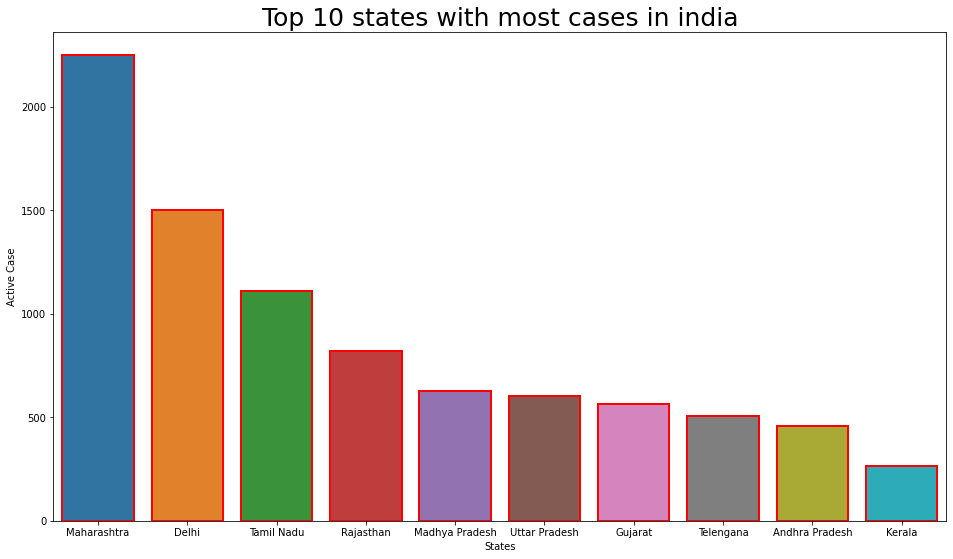

In [ ]:
tpp_10_active_cases=data.groupby(by='State/UT').max()[['Active','Date']].sort_values(by=['Active'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 states with most cases in india",size=25)
ax=sns.barplot(data=tpp_10_active_cases.iloc[:10],y="Active",x="State/UT",linewidth=2,edgecolor='red')
plt.xlabel("States")
plt.ylabel("Active Case")
plt.show()

Top 10 states with Highest Death Rate

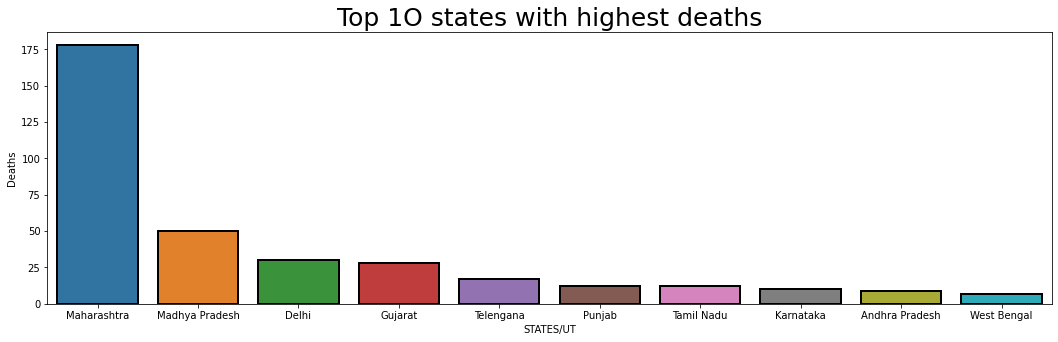

In [ ]:
top_states_deathrate=data.groupby(by="State/UT").max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Top 1O states with highest deaths",size=25)
ax=sns.barplot(data=top_states_deathrate.iloc[:10],y='Deaths',x='State/UT',linewidth=2,edgecolor='black')
plt.xlabel("STATES/UT")
plt.ylabel("Deaths")
plt.show()

Growth trends

Text(0.5, 1.0, 'Growth trends')

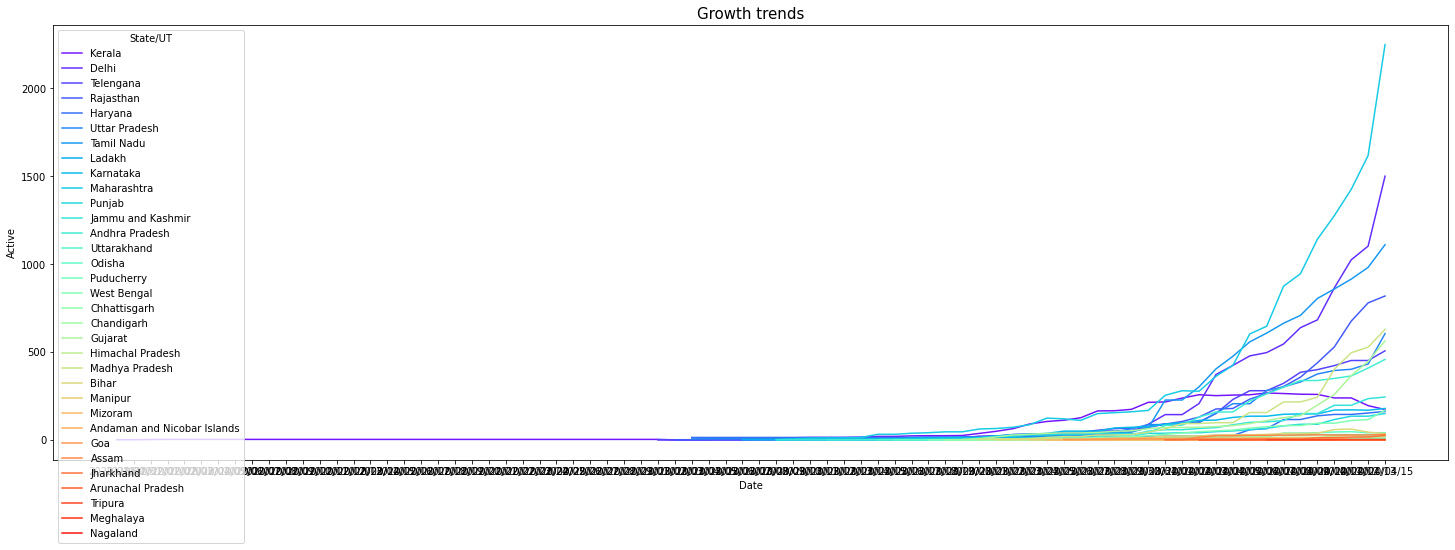

In [9]:
fig=plt.figure(figsize=(25,8))
ax=sns.lineplot(data=data_covid, x="Date", y="Active", hue="State/UT", palette="rainbow")
ax.set_title("Growth trends",size=15)

In [12]:
testing_data.tail()

,Unnamed: 0,day,totalSamplesTested,totalPositiveCases,Source,positive_ratio,perday_positive,perday_tests
22,22,03/04/20,69245,2653,ICMR_testing_update_03April_9PM_IST.pdf,3.74,470.0,12565.0
23,23,04/04/20,79950,3113,https://icmr.nic.in/sites/default/files/whats_...,4.30,460.0,10705.0
24,24,05/04/20,89534,3554,https://icmr.nic.in/sites/default/files/whats_...,4.60,441.0,9584.0
25,25,06/04/20,101068,4135,https://icmr.nic.in/sites/default/files/whats_...,5.04,581.0,11534.0
26,26,07/04/20,114015,4616,ICMR_testing_update_07April_9PM_IST.pdf,3.72,481.0,12947.0


In [7]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          27 non-null     int64  
 1   day                 27 non-null     object 
 2   totalSamplesTested  27 non-null     int64  
 3   totalPositiveCases  27 non-null     int64  
 4   Source              27 non-null     object 
 5   positive_ratio      26 non-null     float64
 6   perday_positive     26 non-null     float64
 7   perday_tests        26 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.8+ KB


NO OF SAMPLES TESTED VS POSITIVE CASES

In [11]:
samples=testing_data["totalSamplesTested"].sum()
positive_case=testing_data["totalPositiveCases"].sum()
px.pie(names=["TotalSamples","PositiveCases"],values=[samples,positive_case], title= "TotalSamples_VS_Positivecases")

In [15]:
vaccine_data=pd.read_csv("/content/drive/MyDrive/Dataset/covid_vaccine_statewise.csv")

In [16]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [17]:
vaccine_data.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


MALE VS FEMALE

In [29]:
male=vaccine_data["Male(Individuals Vaccinated)"].sum()
female=vaccine_data["Female(Individuals Vaccinated)"].sum()
px.pie(names=["Male","Female"],values=[male,female], title= "Male and Female Vaccines")

In [30]:
vaccine=vaccine_data[vaccine_data!='India']
vaccine
#remove rows with india

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,NaN,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,NaN,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,NaN,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,NaN,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,NaN,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
vaccine.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)
vaccine

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,NaN,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,NaN,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,NaN,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,NaN,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,NaN,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Most vaccinated state
max_vac=vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total',ascending=False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


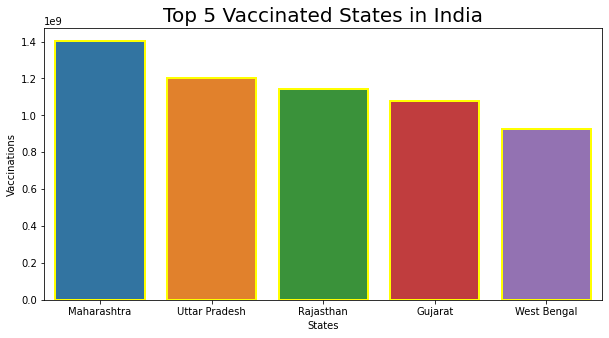

In [38]:
fig=plt.figure(figsize=(10,5))
plt.title("Top 5 Vaccinated States in India",size=20)
ax=sns.barplot(data=max_vac.iloc[:10],y=max_vac.Total,x=max_vac.index,linewidth=2,edgecolor='yellow')
plt.xlabel("States")
plt.ylabel("Vaccinations")
plt.show()

In [41]:
#Least vaccinated state
min_vac=vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vac = min_vac.sort_values('Total',ascending=True)[:5]
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


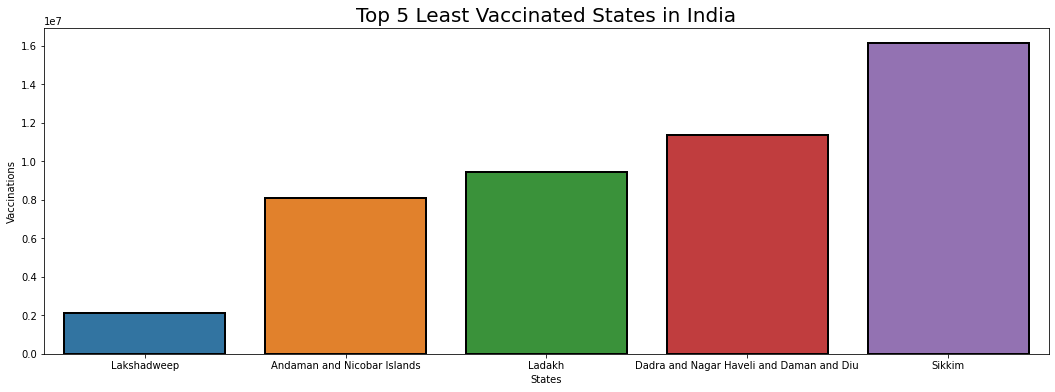

In [45]:
fig=plt.figure(figsize=(18,6))
plt.title("Top 5 Least Vaccinated States in India",size=20)
ax=sns.barplot(data=min_vac.iloc[:10],y=min_vac.Total,x=min_vac.index,linewidth=2,edgecolor='black')
plt.xlabel("States")
plt.ylabel("Vaccinations")
plt.show()
